## 변수

id : 삭제<br>
age : 정규분포형태를 띔.<br>
⇒ **범주화**를 진행해도 좋을듯? 10단위로 끊어서

**gender** : 성별

⇒ **성별로 소득이 차이가 나는지 확인하기**<br>
남자가 소득이 더 많음(성별과 소득 관계에서 연령대별로 차이도 발생하는지 확인해볼 것)

**Education_Status :** 

많은 종류의 학력 수준을 파악함. 

**좁은 범위로 줄이기 위해서 비슷한 데이터끼리 합치는 과정을 함.**<br>
문자형을 숫자형으로 만들기 위해 인코딩을 진행해야함. 

교육수준은 명목형 변수가 아닌 순서형 변수이므로 학력 수준이 증가할수록 높은 숫자를 부여할 필요가 있다고 생각

**가설 : 교육수준이 높을수록 소득이 높을 것이다.**
**시각화 결과 :** 

Pre-High School과 High School의 격차는 크게 발생함. 

High School과 High School Graduate(고등학교 졸업자)의 차이도 크게 발생하였음. 하지만 고등학교 졸업자부터는 차이가 거의 발생하지 않음.

→ 궁굼한 점 : 혹시 1이나 2의 개인들이 나이가 아직 10대이지는 않은지? 

**⇒ 실제로 1(Pre-High Schoo)의 값에서는 20대 미만인 사람들이 많았음**

⇒ 2 변수에서도 20대 미만인 개인들이 많이 존재했음. 

그렇다면 20대 미만의 학생들과 20대 이상의 중졸 고등학교 중퇴인 사람들이 많다는 것임. 그렇다면 이들을 동일선상에서 비교할 수 있을까?

처리해야하는 것 :**무직인 사람들을 명확히 구분할 필요가 있음.**

solution : 아**직 학생(0~19세)이고 교육수준(education status)이 중졸, 고졸 중퇴인 사람들은 제거해야 될 것 같음,.**

**⇒ 백수로 처리**

 **.*armed forces or children (군대 혹은 아이) **
 
- 군인이 급여가 없는건가?
- **0~19세는 소득이 거의 없음**

⇒ 0~19세 사이의 전처리가 중요할 것 같음

⇒ 변수의 값이 종속변수에 영향을 많이 미치는지 파악해보기

**‘Working_Week (Yearly) **

일년에 몇주를 일하는지 

**가설 : 많이 일 할수록 소득이 많은가?**

**⇒ 4500이상치는 평균으로 대체해야할듯함**

⇒ 일을 하는데 소득이 없다? → 문제가 있는 값임 - 제거필요할듯

⇒ 다른 값에도 이러한 이상치가 존재하는지 확인해야함

⇒ 이상치가 많아서 모두 제거를 하기는 무리가 있음.

#예를들어 18주를 일하는 사람의 평균을 적용한다고 하면 이상치가 나타난 것은 제외하고 평균을 구해야함0의 개수를 구하고 0이아닌 개수들끼리는sum을 진행 - 이상치 값 => 평균

**Industry_Status**
가장 많은 값은 not in universe or children임→ 이들은 소득을 가지고 있지 않음 

etail을 시각화 해보니까 이상한 변수가 아닌 소매점업계로 저장된 값임에도 불구하고 소득이 없는 ‘0’값이 나오는 경우가 많아. 

**⇒ 데이터에 0으로 표시된 값이 너무 많음.**

군인과 아이들 , Not in universe는 소득이 없는 값이었음.

unkown은 소득이 집계되지 않은 값들이 많았음.

**⇒산업군과 직업군 변수에서는 의미상 큰 차이가 있을지 의문임**

**Race**

인종별로는 소득 차이가 발생하지 않았음.

→ 분포수가 차이나는 것은 아닐까?

⇒넘어가기

**Hispanic_Origin**

변수검색이 안돼서 인사이트 찾지 못했음. na(결측치 값이 존재함)

**Martial_Status**

**Household_Status**

차이는 존재하지만 해석하기 어려운 값임

**Household_Summary**

**★집을 가지고 있는 사람일수록 소득수준이 높았음**

**Citizenship**

차이가 많이 존재하지 않음

**Birth_Country**

이상치가 심한 경우 존재함.

**Gains(이득 또는 매출로 보임)**

**99999 값이 30개가 존재함. 이상치로 파악할 수 있음.**

→ 전처리 필요

→0의 값이 많음

**Losses (지출로보임)**

**Dividends** 

**배당금, 연속형 변수**

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(42) #seed 고정

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


display(train.head(3))
display(test.head(3)) 


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


In [3]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [3]:
## 고유값을 확인

for i in train.columns:
    print(i, len(train[i].unique()))
    print(train[i].unique())
    print()
    

ID 20000
['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_19997' 'TRAIN_19998'
 'TRAIN_19999']

Age 91
[63 37 58 44 55 67 64 24 53 56 75 34 40 21 10 48 36 29 28 16 31 76 39 49
 60 15 59 23 35 57 17 18  7 52 41 42 30 43 22 61 46 19 27 38 50 26  5 81
 47 25 12 66 82 70 11 51 13 45 33 54 14  9 71 80 32  1  8 20  6  2 73 62
  3 83 72  0 69 65  4 90 85 74 68 84 77 79 78 86 87 88 89]

Gender 2
['M' 'F']

Education_Status 17
['Middle (7-8)' 'Associates degree (Vocational)' 'High graduate'
 'Masters degree' 'Bachelors degree' 'High Freshman' 'Elementary (1-4)'
 'College' 'Children' 'High Sophomore' 'Associates degree (Academic)'
 'High Junior' 'Elementary (5-6)' 'Doctorate degree' 'Professional degree'
 'High Senior' 'Kindergarten']

Employment_Status 8
['Full-Time' 'Children or Armed Forces' 'Not Working' 'Seeking Full-Time'
 'Choice Part-Time' 'Part-Time (Usually Part-Time)'
 'Part-Time (Usually Full-Time)' 'Seeking Part-Time']

Working_Week (Yearly) 53
[ 4 52 50  0  5 30 40 20 14  6 12

# eda

In [178]:
train['Income'].value_counts()[:50]

Income
0       8697
500      743
700      550
600      547
800      526
1000     401
425      389
900      342
550      281
1200     245
650      239
1100     226
750      208
1500     206
450      202
1300     200
525      163
850      153
1600     147
1400     147
1800     143
1700     111
2000     110
475      107
435      105
400      103
625       95
575       85
950       77
1050      75
1250      66
725       61
1150      54
675       53
1900      53
825       49
2100      47
2200      45
875       42
2300      40
465       37
2500      36
200       30
925       28
213       27
1025      27
1450      27
730       26
300       24
1350      24
Name: count, dtype: int64

In [152]:
train['Race'].value_counts()

Race
White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: count, dtype: int64

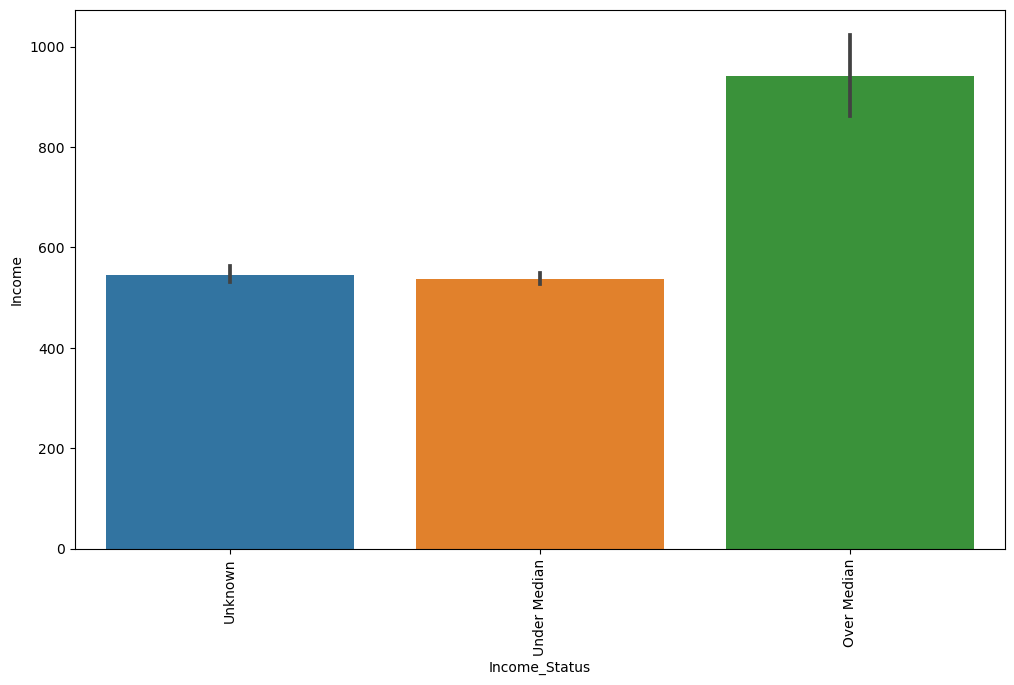

In [175]:
plt.figure(figsize=(12,7))
sns.barplot(x='Income_Status', y='Income', data= train)
plt.xticks(rotation=90)
plt.show()

In [177]:
train[train['Income_Status']=='Unknown']

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,G_Education_Status
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,US,US,US,Nonfiler,0,0,0,Unknown,425,1
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,US,US,US,Head of Household (HOH),0,0,0,Unknown,570,3
6,TRAIN_00006,67,M,Middle (7-8),Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,US,US,US,Nonfiler,0,0,0,Unknown,0,1
11,TRAIN_00011,75,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,White,Cuban,...,Cuba,Cuba,Cuba,Nonfiler,0,0,0,Unknown,0,2
13,TRAIN_00013,40,M,Elementary (1-4),Full-Time,52,Manufacturing (Durable),Machine Operators & Inspectors,White,Mexican (Mexicano),...,Mexico,Mexico,Mexico,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,TRAIN_19986,31,M,Middle (7-8),Not Working,0,Not in universe or children,Unknown,White,All other,...,US,US,US,Nonfiler,0,0,0,Unknown,0,1
19989,TRAIN_19989,14,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,US,US,US,Nonfiler,0,0,0,Unknown,0,1
19990,TRAIN_19990,8,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,Asian/Pacific,All other,...,Japan,Japan,Japan,Nonfiler,0,0,0,Unknown,0,1
19991,TRAIN_19991,51,F,High graduate,Children or Armed Forces,48,Retail,Management,White,All other,...,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,800,3


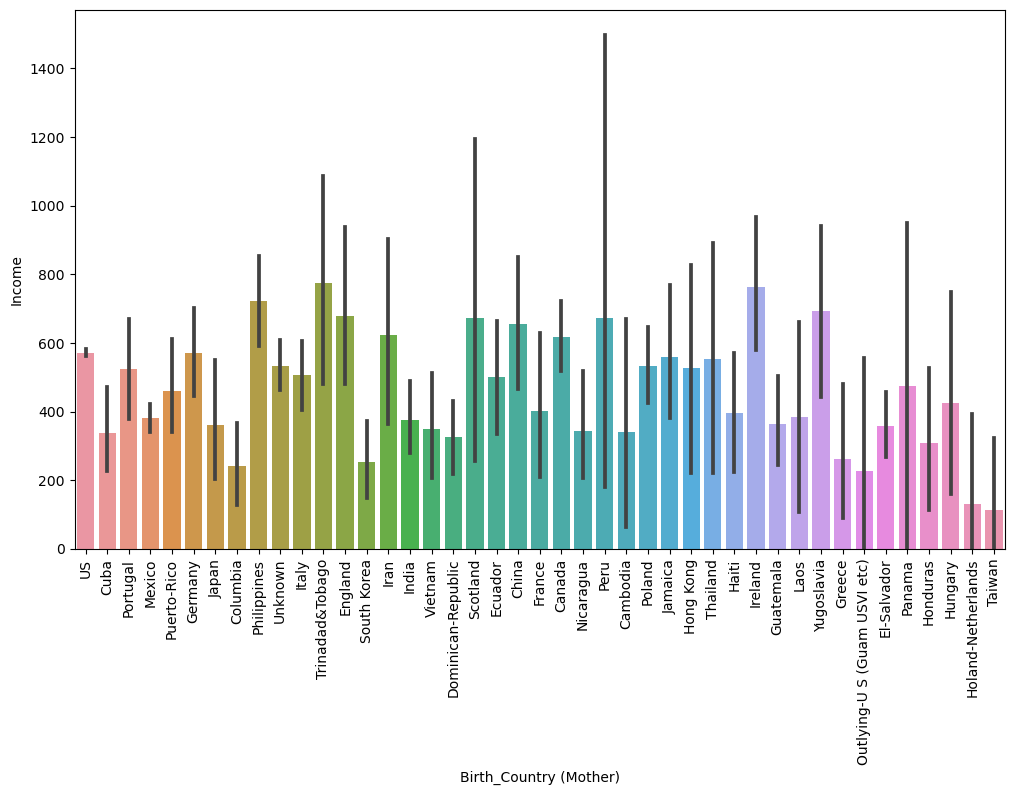

In [165]:
plt.figure(figsize=(12,7))
sns.barplot(x='Birth_Country (Mother)', y='Income', data= train)
plt.xticks(rotation=90)
plt.show()

In [149]:
train['Martial_Status'].value_counts()


Martial_Status
Married                         9554
Single                          7380
Divorced                        1633
Widowed                          756
Separated                        436
Married (Spouse Absent)          171
Married (Armed Force Spouse)      70
Name: count, dtype: int64

In [128]:
train['Race'].value_counts()

Race
White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: count, dtype: int64

In [131]:
train['Hispanic_Origin'].value_counts()

Hispanic_Origin
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: count, dtype: int64

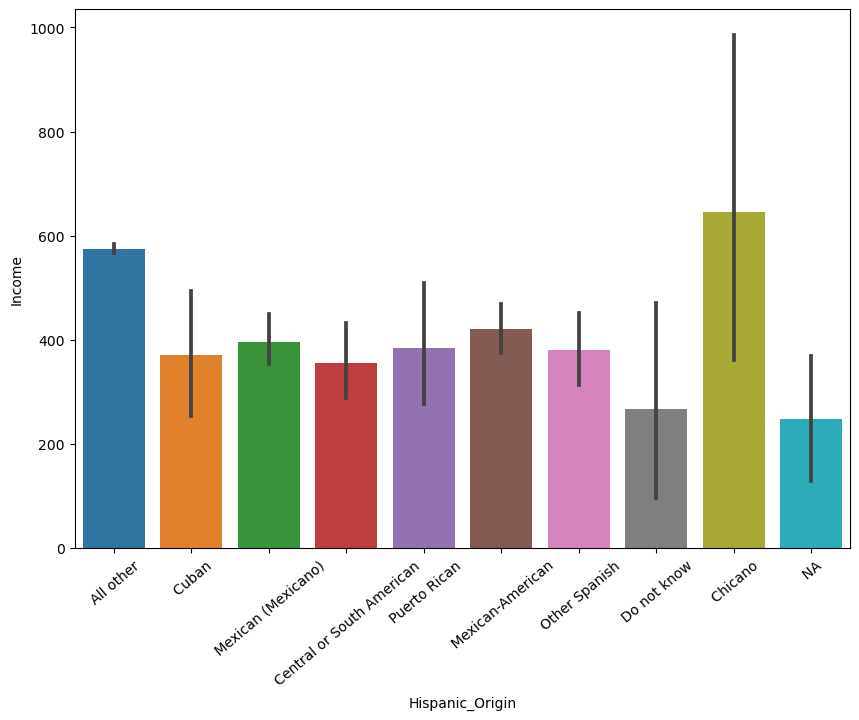

In [134]:
plt.figure(figsize=(10,7))
sns.barplot(x='Hispanic_Origin', y='Income', data= train)
plt.xticks(rotation=40)
plt.show()

In [146]:
train['Hispanic_Origin'].value_counts()
train['Hispanic_Origin']=='Chicano'

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: Hispanic_Origin, Length: 20000, dtype: bool

In [130]:
train['Hispanic_Origin'].value_counts()

Hispanic_Origin
 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: count, dtype: int64

In [127]:
train['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

In [121]:
train['Occupation_Status'].value_counts()

Occupation_Status
Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: count, dtype: int64

In [126]:
unkown_occsta=train[train['Occupation_Status']=='Unknown']
unkown_occsta[['Occupation_Status','Income']].value_counts()

Occupation_Status  Income
Unknown            0         4688
Name: count, dtype: int64

In [119]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income',
       'G_Education_Status'],
      dtype='object')

In [93]:
train['Industry_Status'].value_counts()

Industry_Status
Not in universe or children                     4688
Retail                                          3149
Manufacturing (Durable)                         1575
Manufacturing (Non-durable)                     1223
Education                                       1041
Business & Repair                                847
Medical (except Hospitals)                       838
Construction                                     832
Hospitals                                        821
Finance Insurance & Real Estate                  727
Transportation                                   693
Public Administration                            641
Other professional services                      477
Wholesale                                        450
Personal Services (except Private Household)     429
Social Services                                  367
Entertainment                                    278
Agriculture                                      268
Utilities & Sanitary          

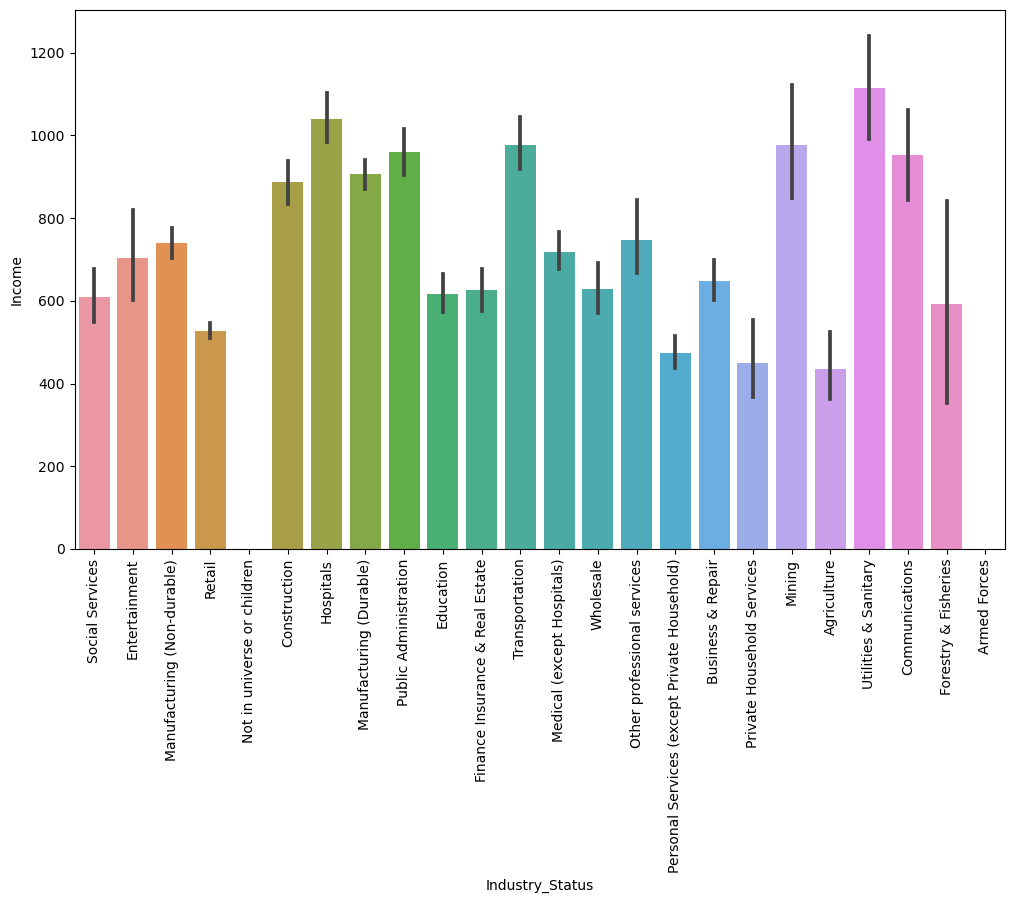

In [118]:
plt.figure(figsize=(12,7))
sns.barplot(x='Industry_Status', y='Income', data= train)
plt.xticks(rotation=90)
plt.show()

In [113]:
#외계인과 아이는 수익이 모두 0으로 표기되었음

외계인과아이=train[train['Industry_Status']=='Retail']
# 외계인과아이[['Age','Industry_Status','Working_Week (Yearly)','Income']]
# sns.barplot(x='Industry_Status',y='Income', data= 외계인과아이)

외계인과아이['Income'].value_counts()[:50]

Income
0       699
500     289
425     184
600     163
700     126
550     111
450     111
800     102
525      71
435      60
475      60
650      56
900      52
400      46
575      40
1000     39
750      36
625      30
213      24
465      22
1100     19
850      19
1200     18
200      15
445      15
825      13
1500     13
300      13
675      12
725      12
530      11
440      10
485       9
1300      9
455       9
505       9
640       9
535       9
510       8
610       8
540       8
730       8
875       8
1400      8
490       8
2000      8
460       8
1800      7
1600      7
1050      7
Name: count, dtype: int64

In [106]:
외계인과아이['Income'].value_counts()
# train[train['Working_Week (Yearly)']==18]['Income'][:50]


Income
0    4688
Name: count, dtype: int64

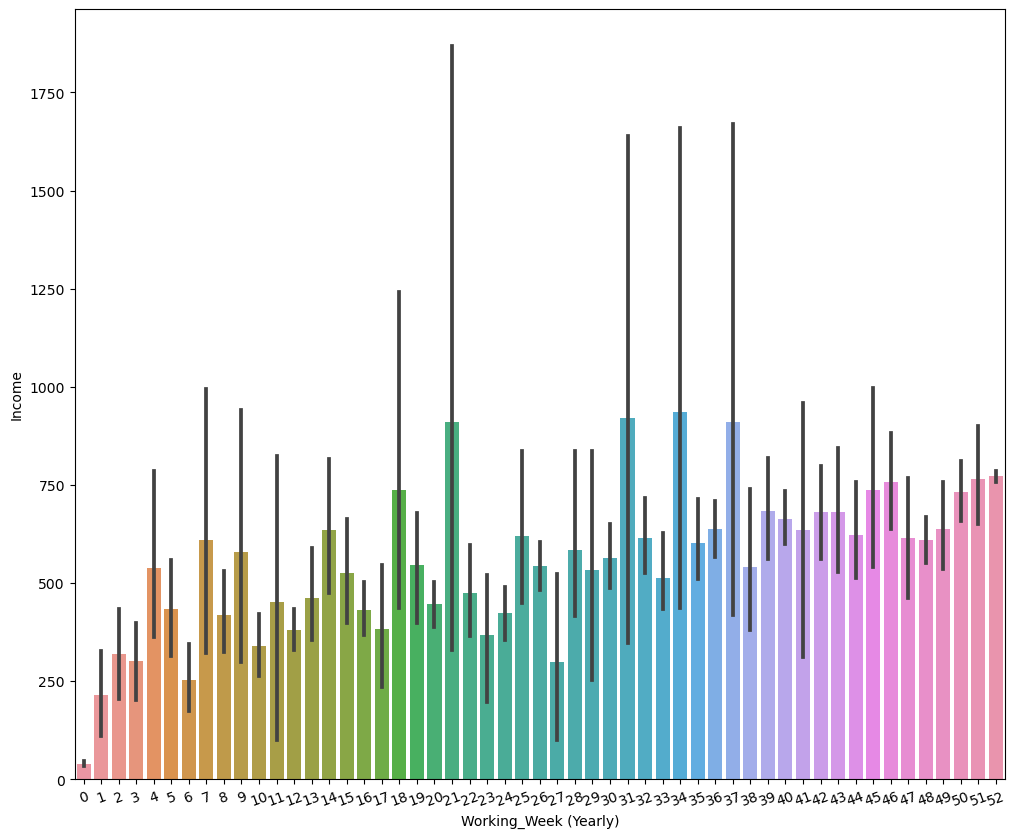

In [69]:
plt.figure(figsize=(12,10))
sns.barplot(x='Working_Week (Yearly)' ,y='Income', data= train)
plt.xticks(rotation=20)
plt.show()

- 일을 하는데 소득이 0으로 나오는 값을 찾아서 제거하거나 평균 값으로 대체해야함/ 혹은 값이 너무 높은 이상치는 제거해주기

In [75]:
work_21=train[train['Working_Week (Yearly)']==0]
len(work_21)

#0은 무직으로 처리해야함

4720

1주 : 1주를 일했는데 돈을 받지 못한 사람들이 많음

In [91]:
work_21=train[train['Working_Week (Yearly)']==3]
print(len(work_21))
# work_21['Working_Week (Yearly)'].value_counts()
train[train['Working_Week (Yearly)']==18]['Income'][:50]

#예를들어 18주를 일하는 사람의 평균을 적용한다고 하면 이상치가 나타난 것은 제외하고 평균을 구해야함
# 0의 개수를 구하고 0이아닌 개수들끼리는sum을 진행 - 이상치 값 => 평균

32


739      1300
841         0
1078        0
2243        0
2756      700
3324        0
3751     2000
4805      550
4885      600
5018        0
5770      425
5873      500
6861      938
7739        0
8144     1000
8426     2000
8621      515
8673      500
8962     1400
9006      445
10036     438
10159     876
10655    2038
12141     500
12155       0
12310     525
12331     450
13083       0
14052       0
14267     600
14385     435
14592       0
14799     585
15211     500
16111     500
16259    1000
16562     500
16579     425
16648     500
16762       0
16781       0
17890       0
18104     575
18389     528
19030    9400
19187     700
Name: Income, dtype: int64

In [72]:
work_21=train[train['Working_Week (Yearly)']==21]
# work_21['Working_Week (Yearly)'].value_counts()
len(work_21)

#21주만 일하는 사람은 9명밖에없음. (9명만으로 평균을 구하기는 무리 존재)

9

In [74]:
train[train['Working_Week (Yearly)']==21]['Income']

515       600
1530      635
3282        0
3709      425
6533        0
13110     625
14718     700
16982    4500
17561     719
Name: Income, dtype: int64

In [68]:
#한주에 일하는 시간이 없는 사람은 소득이 없는지 확인 (혹시 이상치가 존재할 수도있음) )

work_not=train[train['Working_Week (Yearly)']==0]
work_not['Working_Week (Yearly)'].value_counts()

Working_Week (Yearly)
0    4720
Name: count, dtype: int64

In [55]:
train['Working_Week (Yearly)'].value_counts()

Working_Week (Yearly)
52    10613
0      4720
40      440
50      363
48      313
26      283
20      213
12      209
30      207
36      181
32      139
44      138
16      134
51      134
8       129
49      117
35      115
24      105
46       97
45       95
42       94
39       87
28       79
4        78
10       67
25       63
43       58
38       57
6        55
13       54
15       48
18       46
22       45
47       43
2        41
1        34
14       34
5        32
3        32
17       30
7        28
34       23
9        23
37       20
19       13
41       13
27       12
11       10
21        9
29        8
23        8
31        6
33        5
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Income'>

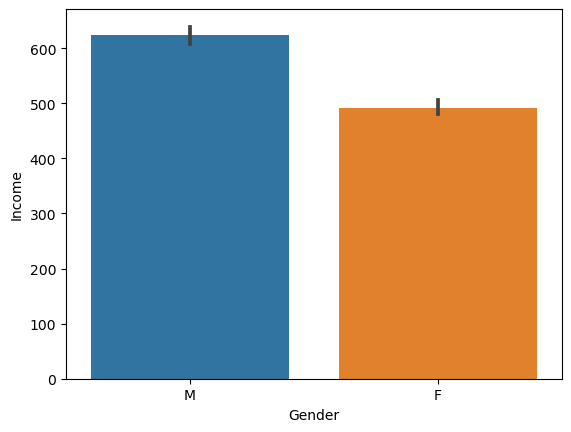

In [8]:
gender_inc=train[['Gender','Income']]
sns.barplot(x='Gender',y='Income',data=gender_inc)


In [29]:
train['Employment_Status'].value_counts()

Employment_Status
Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: count, dtype: int64

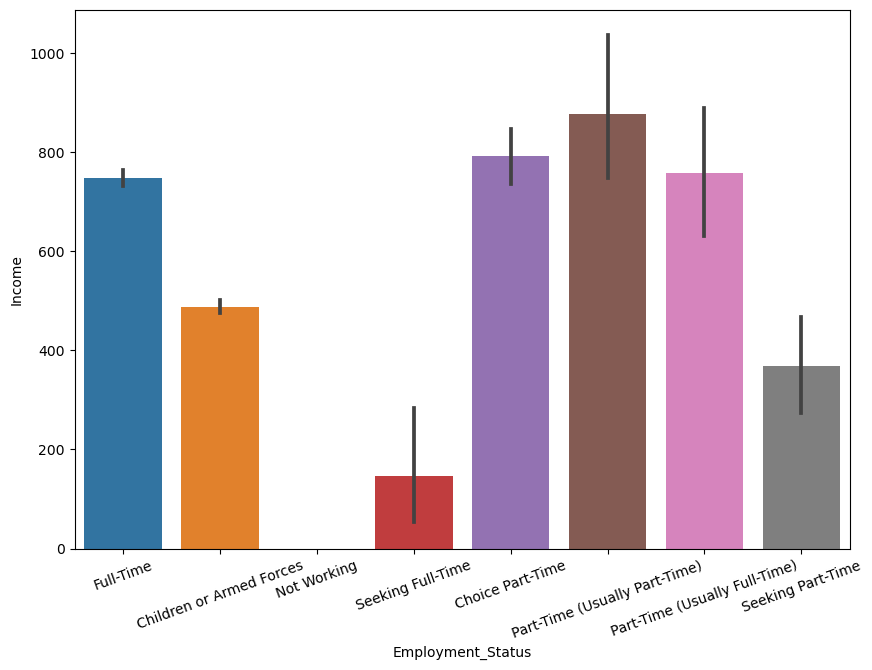

In [38]:
employ_income=train[['Employment_Status','Income']]
employ_income
plt.figure(figsize=(10,7))
sns.barplot(x='Employment_Status',y='Income', data=employ_income)
plt.xticks(rotation=20)

plt.show()

In [48]:
아이와군인 = train[train['Employment_Status']=='Children or Armed Forces']
아이와군인[['Age','Employment_Status','Income']].head(50)

,Age,Employment_Status,Income
6,67,Children or Armed Forces,0
8,24,Children or Armed Forces,0
10,56,Children or Armed Forces,0
11,75,Children or Armed Forces,0
14,44,Children or Armed Forces,0
16,10,Children or Armed Forces,0
17,48,Children or Armed Forces,850
19,29,Children or Armed Forces,950
22,31,Children or Armed Forces,0
23,76,Children or Armed Forces,0


In [51]:
train['Employment_Status'].value_counts()

Employment_Status
Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: count, dtype: int64

In [50]:
len(아이와군인)

11142

## race

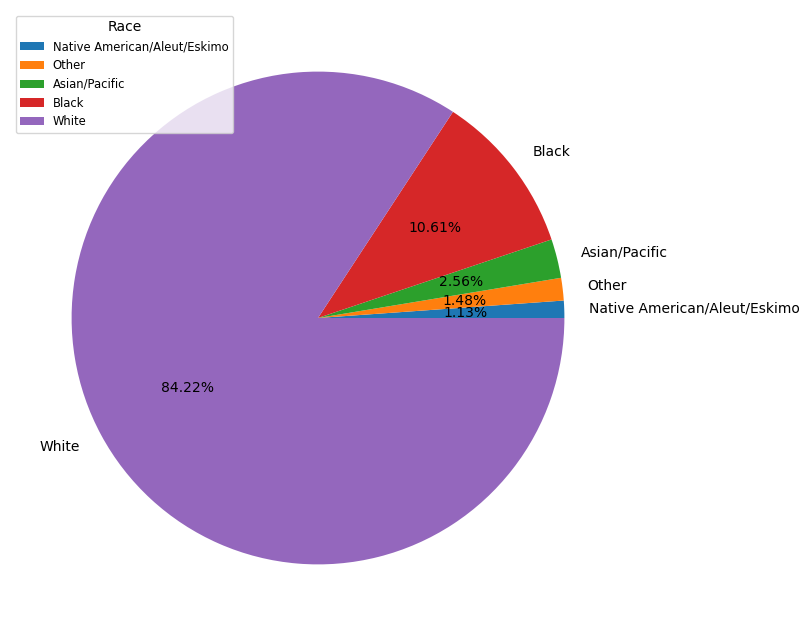

In [4]:
# Race 값의 빈도수 계산 및 정렬
race_counts = train['Race'].value_counts().sort_values()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 차트의 크기 조정
plt.pie(race_counts, labels=race_counts.index, autopct='%1.2f%%')

# 범례 추가하기
plt.legend(title='Race', loc='best', fontsize='small')  # 범례의 제목, 위치 및 글씨 크기 설정

plt.show()

**백인이 가장 많음  -> 인종과 소득의 상관관계를 계산해보기**

<Axes: xlabel='Race', ylabel='count'>

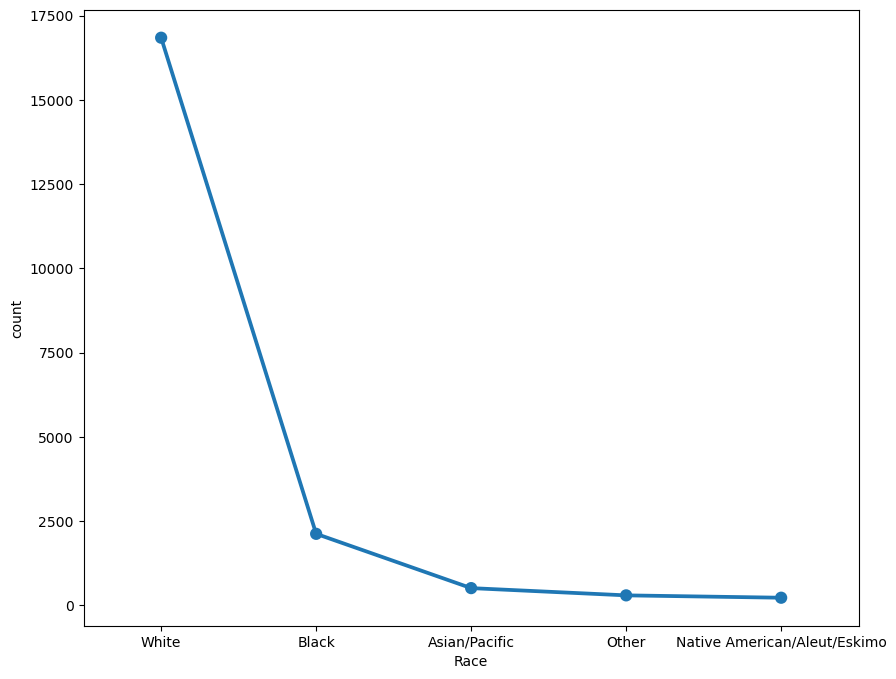

In [5]:
count_data = train['Race'].value_counts().reset_index()
count_data.columns = ['Race', 'count']

plt.figure(figsize=(10,8))

sns.pointplot(x='Race', y='count',data=count_data)

### 상관관계

In [6]:
train = pd.get_dummies(train, columns =['Race'])
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Hispanic_Origin,Martial_Status,...,Gains,Losses,Dividends,Income_Status,Income,Race_Asian/Pacific,Race_Black,Race_Native American/Aleut/Eskimo,Race_Other,Race_White
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,All other,Married,...,0,0,0,Unknown,425,False,False,False,False,True
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,All other,Separated,...,0,0,0,Under Median,0,False,False,False,False,True
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),All other,Married,...,3411,0,0,Under Median,860,False,True,False,False,False
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,All other,Divorced,...,0,0,0,Under Median,850,False,False,False,False,True
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,All other,Divorced,...,0,0,0,Unknown,570,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,All other,Single,...,0,0,0,Under Median,1300,False,False,False,False,True
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),Mexican-American,Single,...,0,0,0,Under Median,850,False,False,False,False,True
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,All other,Single,...,0,0,0,Unknown,999,False,False,False,False,True
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,All other,Widowed,...,0,0,0,Under Median,0,False,False,False,False,True


<Axes: >

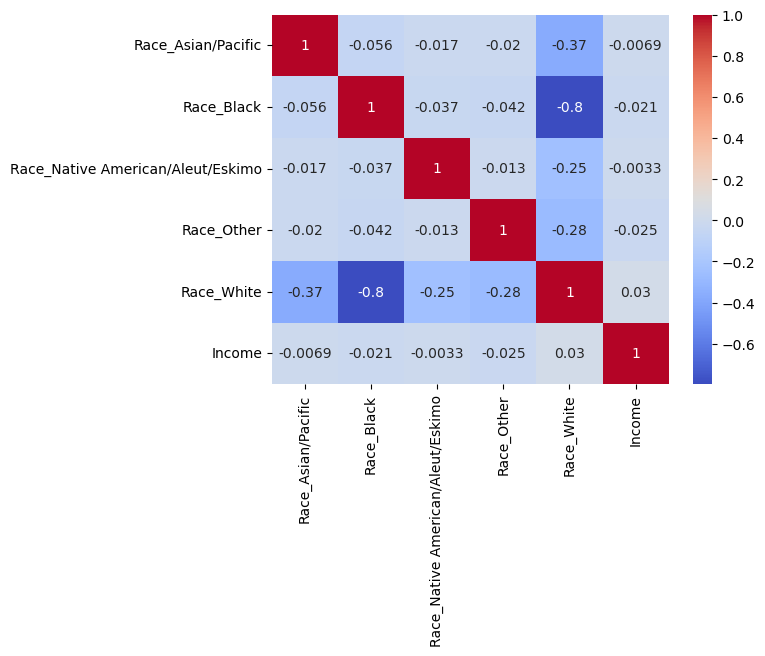

In [7]:
race_cor = train[['Race_Asian/Pacific', 'Race_Black', 'Race_Native American/Aleut/Eskimo',
       'Race_Other', 'Race_White','Income']]

race_corr = race_cor.corr()

sns.heatmap(race_corr, annot=True, cmap='coolwarm')



## 숫자형 피처 이상치 파악

Text(0.5, 1.0, 'Income outlier')

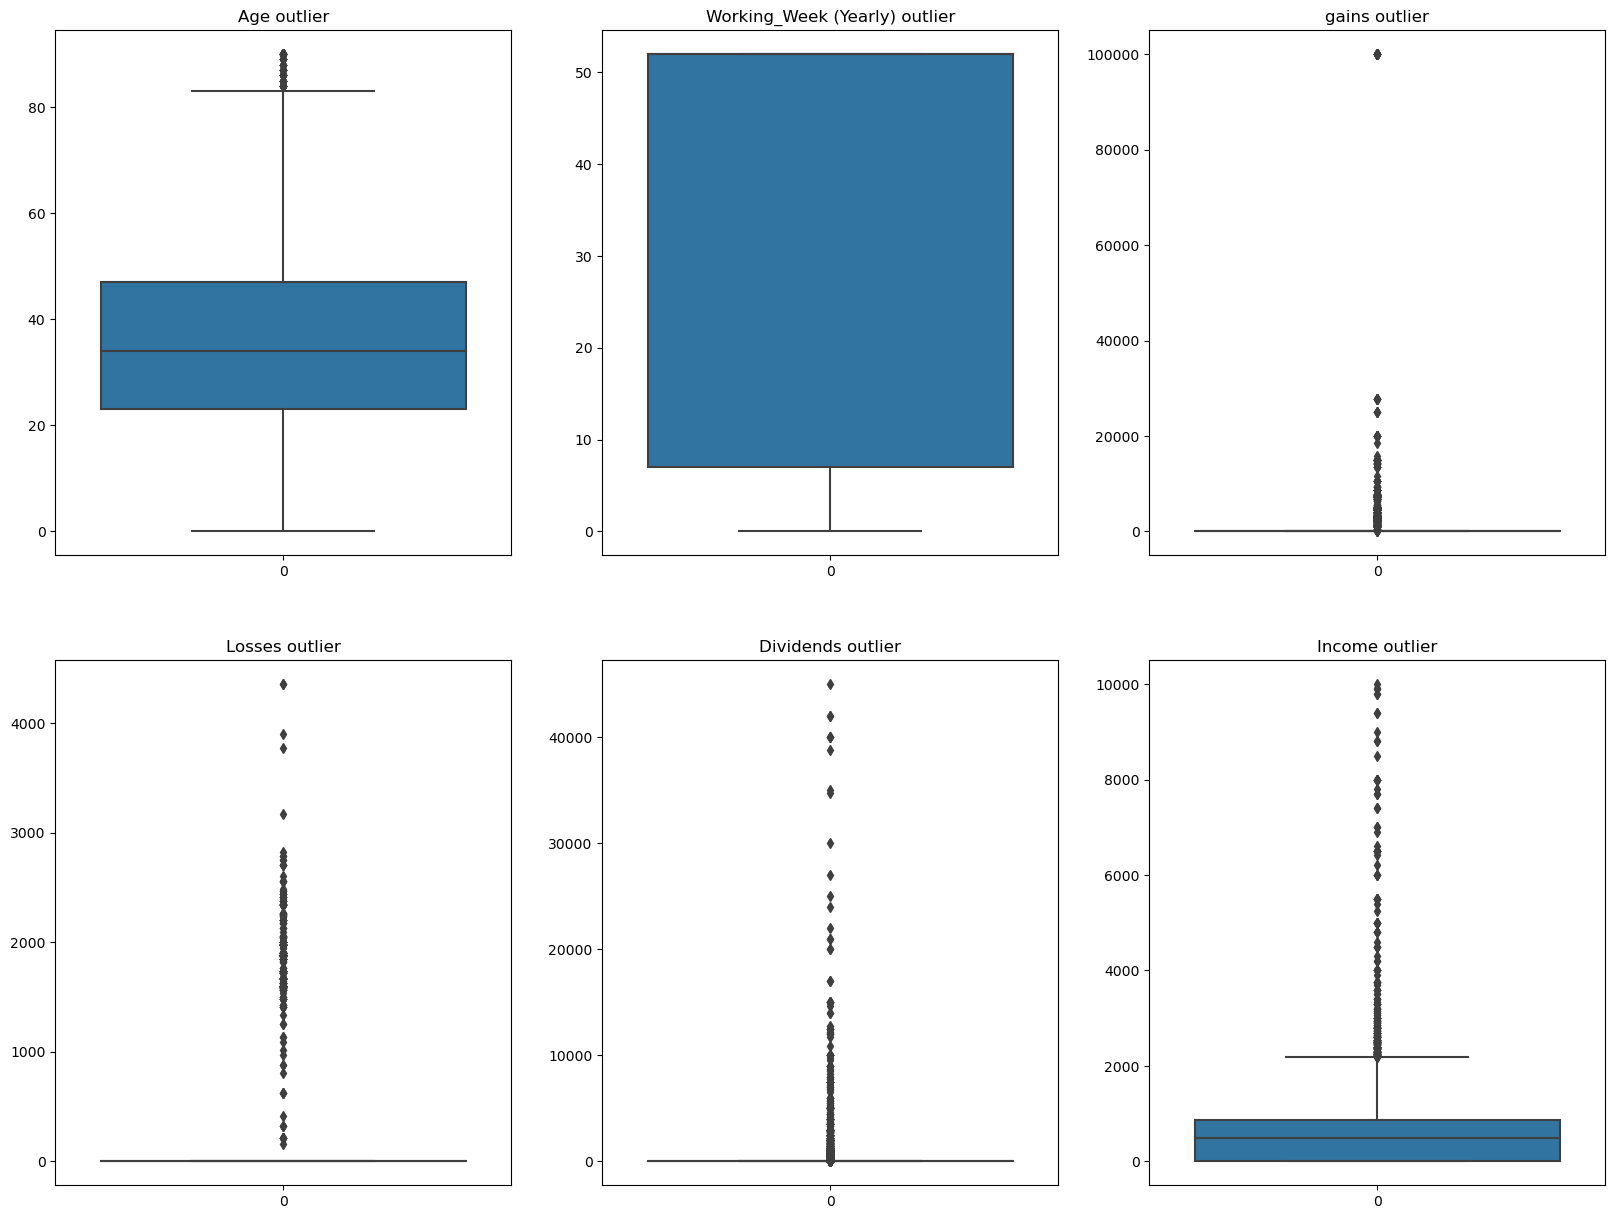

In [8]:


f,ax = plt.subplots(2,3, figsize=(20,15))

sns.boxplot(train['Age'], ax=ax[0,0])
ax[0,0].set_title('Age outlier')
#############################################
sns.boxplot(train['Working_Week (Yearly)'], ax=ax[0,1])
ax[0,1].set_title('Working_Week (Yearly) outlier')
#############################################
sns.boxplot(train['Gains'], ax=ax[0,2])
ax[0,2].set_title('gains outlier')
#############################################
sns.boxplot(train['Losses'], ax=ax[1,0])
ax[1,0].set_title('Losses outlier')
#############################################
sns.boxplot(train['Dividends'], ax=ax[1,1])
ax[1,1].set_title('Dividends outlier')
#############################################
sns.boxplot(train['Income'], ax=ax[1,2])
ax[1,2].set_title('Income outlier')

## 성별과 소득

In [9]:
train[['Age','Income']]

,Age,Income
0,63,425
1,37,0
2,58,860
3,44,850
4,37,570
...,...,...
19995,33,1300
19996,20,850
19997,22,999
19998,76,0


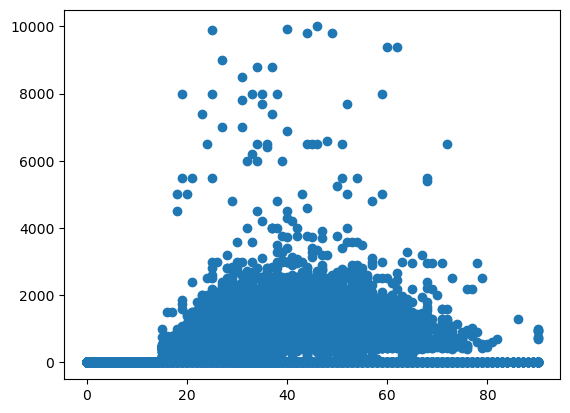

In [10]:
# matplotlib를 사용한 산점도
plt.scatter(data=train, x='Age', y='Income')
plt.show()

20세 이하는 소득이 거의 없음 -> 20세 이하만 분석

In [11]:
age_20un=train[train['Age']<20]
age_20un

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Hispanic_Origin,Martial_Status,...,Gains,Losses,Dividends,Income_Status,Income,Race_Asian/Pacific,Race_Black,Race_Native American/Aleut/Eskimo,Race_Other,Race_White
16,TRAIN_00016,10,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,All other,Single,...,0,0,0,Unknown,0,False,False,False,False,True
21,TRAIN_00021,16,F,High Freshman,Not Working,14,Not in universe or children,Unknown,All other,Single,...,0,0,0,Under Median,0,False,False,False,False,True
29,TRAIN_00029,15,F,Middle (7-8),Children or Armed Forces,12,Social Services,Services,All other,Single,...,0,0,0,Under Median,0,False,False,False,False,True
35,TRAIN_00035,16,F,High Freshman,Not Working,0,Not in universe or children,Unknown,Puerto Rican,Single,...,0,0,0,Under Median,0,False,False,False,False,True
38,TRAIN_00038,17,F,High Junior,Children or Armed Forces,52,Medical (except Hospitals),Services,All other,Single,...,0,0,0,Unknown,0,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,TRAIN_19975,18,M,High Sophomore,Not Working,0,Not in universe or children,Unknown,All other,Single,...,0,0,0,Unknown,0,False,False,False,False,True
19982,TRAIN_19982,18,F,High Freshman,Children or Armed Forces,0,Not in universe or children,Unknown,Mexican-American,Married (Spouse Absent),...,0,0,0,Unknown,0,False,False,False,False,True
19989,TRAIN_19989,14,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,All other,Single,...,0,0,0,Unknown,0,False,False,False,False,True
19990,TRAIN_19990,8,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,All other,Single,...,0,0,0,Unknown,0,True,False,False,False,False


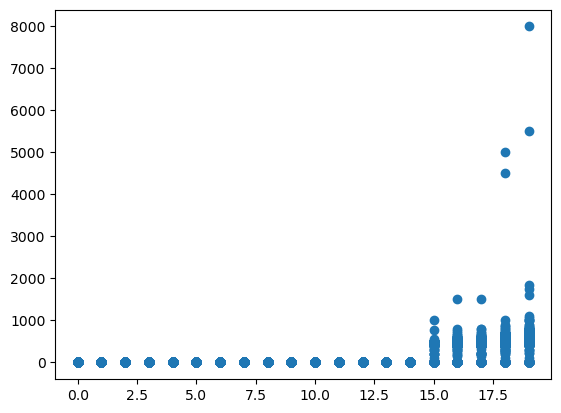

In [12]:
age_20un[['Age','Income']]
plt.scatter(data=age_20un, x='Age',y='Income')
plt.show()

나이분포

<Axes: >

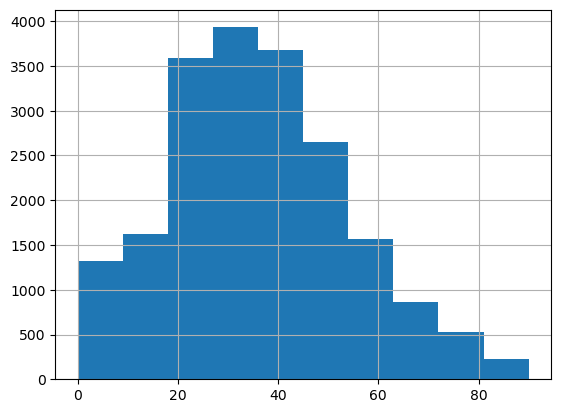

In [13]:
train['Age'].hist()

# feature engineering

## 교육수준 범주화

In [10]:
# 그룹화를 위한 매핑 정의
group_mapping = {
    'Children': 'Pre-High School',
    'Kindergarten': 'Pre-High School',
    'Elementary (1-4)': 'Pre-High School',
    'Elementary (5-6)': 'Pre-High School',
    'Middle (7-8)': 'Pre-High School',
    'High Freshman': 'High School',
    'High Sophomore': 'High School',
    'High Junior': 'High School',
    'High Senior': 'High School',
    'High graduate': 'High School Graduate',
    'College': 'Post-High School',
    'Associates degree (Vocational)': 'Post-High School',
    'Associates degree (Academic)': 'Post-High School',
    'Bachelors degree': 'Undergraduate Degree',
    'Masters degree': 'Graduate Degree',
    'Professional degree': 'Graduate Degree',
    'Doctorate degree': 'Graduate Degree'
}

# 매핑 적용 및 그룹별로 값 합치기
train['G_Education_Status'] = train['Education_Status'].map(group_mapping)
train['G_Education_Status'].value_counts()
# d_train = train.groupby('G_Education_Status')['Counts'].sum().reset_index()

# d_train

G_Education_Status
High School Graduate    6494
Post-High School        5144
Pre-High School         3287
High School             2416
Undergraduate Degree    1956
Graduate Degree          703
Name: count, dtype: int64

In [12]:
# 매핑을 위한 사전 정의
grade_mapping = {'Pre-High School':1, 'High School':2,'High School Graduate':3,
                'Post-High School':4, 'Undergraduate Degree':5,
                'Graduate Degree':6}


train['G_Education_Status'] = train['G_Education_Status'].map(grade_mapping)
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income,G_Education_Status
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,US,US,US,Nonfiler,0,0,0,Unknown,425,1
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,US,US,US,Single,0,0,0,Under Median,0,4
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860,3
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,US,US,US,Single,0,0,0,Under Median,850,3
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,US,US,US,Head of Household (HOH),0,0,0,Unknown,570,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,US,US,US,Single,0,0,0,Under Median,1300,3
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850,4
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,US,US,US,Single,0,0,0,Unknown,999,4
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,US,Scotland,England,Single,0,0,0,Under Median,0,3


In [27]:
train[train['G_Education_Status']==2]['Age'].value_counts()[:50]


Age
17    307
16    250
18    212
15     88
19     57
32     44
24     43
20     43
30     42
28     41
25     39
35     37
33     37
23     36
45     34
36     34
34     34
31     33
49     32
29     32
26     31
39     31
27     30
43     29
40     28
52     28
38     27
53     27
37     27
54     27
59     27
51     27
46     26
50     26
21     26
22     26
57     25
42     25
58     23
44     23
47     23
41     23
56     21
65     21
48     19
60     18
72     17
63     17
55     16
61     15
Name: count, dtype: int64

<Axes: xlabel='G_Education_Status', ylabel='Income'>

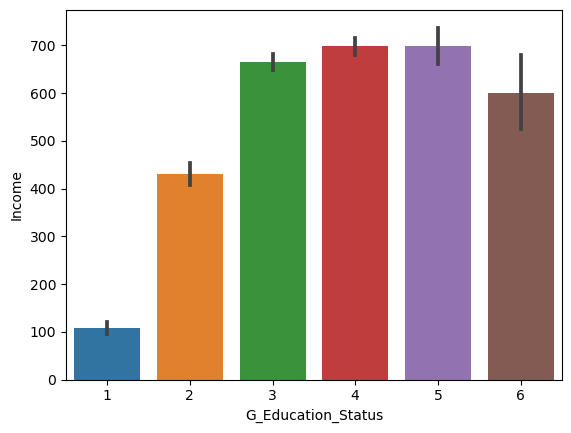

In [13]:
cat_ges = train[['G_Education_Status','Income']]
sns.barplot(x='G_Education_Status', y='Income', data=cat_ges)

In [19]:
train['Employment_Status'].value_counts()

Employment_Status
Children or Armed Forces         11142
Full-Time                         6588
Not Working                       1221
Choice Part-Time                   593
Part-Time (Usually Part-Time)      158
Seeking Full-Time                  121
Part-Time (Usually Full-Time)      100
Seeking Part-Time                   77
Name: count, dtype: int64

In [30]:
employ_income = train[['Employment_Status','Income']]
sorted_employ_income=employ_income.sort_values(by='Income')

sorted_employ_income

,Employment_Status,Income
9999,Not Working,0
12908,Children or Armed Forces,0
6065,Full-Time,0
12924,Full-Time,0
12926,Choice Part-Time,0
...,...,...
467,Children or Armed Forces,9800
992,Full-Time,9800
9869,Full-Time,9900
4951,Children or Armed Forces,9916


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Not Working'),
  Text(1, 0, 'Children or Armed Forces'),
  Text(2, 0, 'Full-Time'),
  Text(3, 0, 'Choice Part-Time'),
  Text(4, 0, 'Part-Time (Usually Part-Time)'),
  Text(5, 0, 'Seeking Part-Time'),
  Text(6, 0, 'Seeking Full-Time'),
  Text(7, 0, 'Part-Time (Usually Full-Time)')])

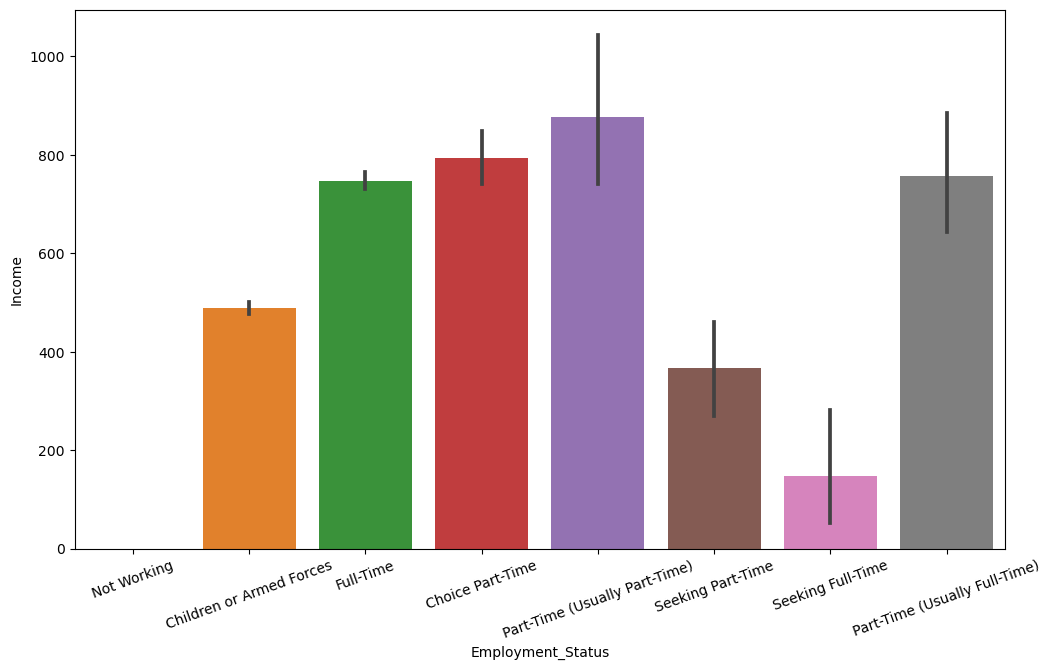

In [43]:
plt.figure(figsize=(12,7))
sns.barplot(x='Employment_Status', y= 'Income',data=sorted_employ_income)
plt.xticks(rotation=20)

In [46]:
len(seeking_full_time)

121

In [37]:
seeking_full_time=train[train['Employment_Status']=='Seeking Full-Time']
seeking_full_time['Income'].describe()

count     121.000000
mean      146.595041
std       655.145284
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6410.000000
Name: Income, dtype: float64

<Axes: >

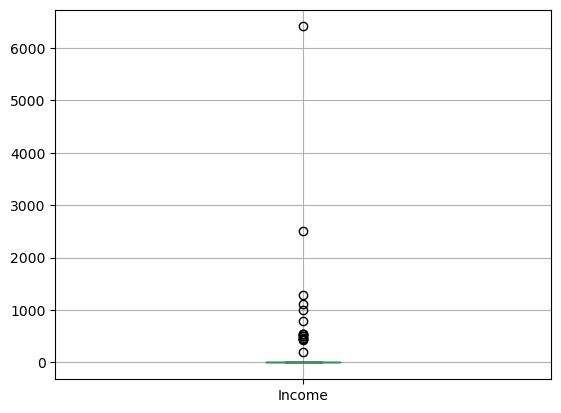

In [41]:
seeking_full_time[['Income']].boxplot()